# Filtering

Filtering is a technique for modifying or enhancing an image.
The filter used in this code will help detect the edges of objects in an image.

Import required libraries

In [29]:
import cv2
import numpy as np
from scipy import misc

Load 'ascent' image from 'scipy' library

In [30]:
img = misc.ascent()

Plot the image with 'matplotlib' library

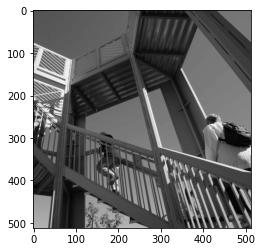

In [31]:
import matplotlib.pyplot as plt
plt.grid(False)
plt.gray()
#plt.axis('off')    # uncomment this line in order to hide axes
plt.imshow(img)
plt.show()

Transform the image and get dimensions of it

Top left corner has (x, y) = (0, 0) coordinates

In [32]:
img_transformed = np.copy(img)
x = img_transformed.shape[0]    # x is width of image
y = img_transformed.shape[1]    # y is height of image

Create a 3x3 filter

In [33]:
filter = [[-1, -2, -1],
          [0, 0, 0],
          [1, 2, 1]]
weight = 1

Create a convolution
Iterate over a image, leaving 1 pixel margin (in all 4 sides)
Ensure convolution value is in range 0 and 255 inclusive

In [34]:
for i in range(1, x-1):
    for j in range(1, y-1):
        convolution = 0.0
        convolution = convolution + (img[i-1][j-1] * filter[0][0])    # up-left multiplied by 1st element of filter
        convolution = convolution + (img[i][j-1] * filter[0][1])      # up multiplied by 2nd element of filter
        convolution = convolution + (img[i+1][j-1] * filter[0][2])    # up-right multiplied by 3rd element of filter
        convolution = convolution + (img[i-1][j] * filter[1][0])      # left multiplied by 4th element of filter
        convolution = convolution + (img[i][j] * filter[1][1])        # center multiplied by 5th element of filter
        convolution = convolution + (img[i+1][j] * filter[1][2])      # right multiplied by 6th element of filter
        convolution = convolution + (img[i-1][j+1] * filter[2][0])    # down-left multiplied by 7th element of filter
        convolution = convolution + (img[i][j+1] * filter[2][1])      # down multiplied by 8th element of filter
        convolution = convolution + (img[i+1][j+1] * filter[2][2])    # down-right multiplied by 9th element of filter
        
        convolution = convolution * weight
        
        if convolution < 0:
            convolution = 0
        if convolution > 255:
            convolution = 255
        
        img_transformed[i][j] = convolution

Plot the transformed (i.e. filtered image)

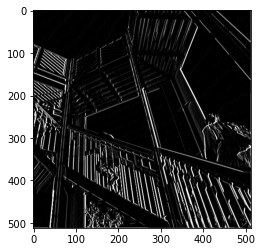

In [35]:
plt.grid(False)
plt.gray()
#plt.axis('off')    # uncomment this line in order to hide axes
plt.imshow(img_transformed)
plt.show()

# Pooling

Pooling is an extraction of important features from the image (i.e. compressing).
This code will show 2x2 max pooling.

Idea:
1. iterate over the image and look at the pixel with coordinates (i, j) and its right with coordinates (i+1, j), down with coordinates (i, j+1), right-down with coordinates (i+1, j+1) neighbours;
2. take maximum pixel value of them;

Halving each dimension of original image create new black image (all pixels are zero)

In [36]:
new_x = x // 2   # // rounds the result down to the nearest whole number (i.e. floor division)
new_y = y // 2
new_img = np.zeros((new_x, new_y))

Implement the idea mentioned above

In [37]:
for i in range(0, x, 2):
    for j in range(0, y, 2):
        pixels = []
        pixels.append(img_transformed[i][j])       # append a current pixel
        pixels.append(img_transformed[i+1][j])     # append a right pixel
        pixels.append(img_transformed[i][j+1])     # append a down pixel
        pixels.append(img_transformed[i+1][j+1])   # append a right-down pixel
        
        new_img[i//2][j//2] = max(pixels)

Plot the compressed image. Note dimensions of the new image 256x256

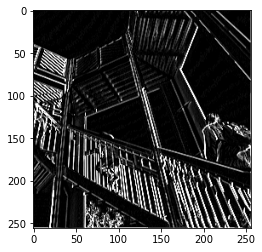

In [38]:
plt.grid(False)
plt.gray()
#plt.axis('off')    # uncomment this line in order to hide axes
plt.imshow(new_img)
plt.show()